# Naive Bayes

## Importing the libraries

In [1]:
import re
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('datasets_483_982_spam.csv')

### 取出訓練內文與標註

In [3]:
X = dataset['content'].to_numpy()
Y = dataset['label'].map({'ham': 0, 'spam': 1}).to_numpy()

In [4]:
print(f"Training Data Examples: \n{X[:5]}")

Training Data Examples: 
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


In [5]:
print('Labeling Data Examples : \n{}'.format(Y[:5]))

Labeling Data Examples : 
[0 0 1 0 0]


### 文字預處理

In [6]:
import nltk
nltk.download(['punkt', 'stopwords', 'averaged_perceptron_tagger', 'wordnet'])

from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix

# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

## 創建Lemmatizer
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """將pos_tag結果mapping到lemmatizer中pos的格式"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN, 
                "V": wordnet.VERB, 
                "R": wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN)

def clean_content(X):
    # remove non-alphabet characters
    X_clean = [re.sub(r'[^a-zA-Z]', ' ', x).lower() for x in X]
    # tokenize
    X_word_tokenize = [nltk.word_tokenize(x) for x in X_clean]
    # stopwords_lemmatizer
    X_stopwords_lemmatizer = []
    stop_words = set(stopwords.words('english'))
    for content in X_word_tokenize:
        content_clean = []
        for word in content:
            if word not in stop_words:
                word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
                content_clean.append(word)
        X_stopwords_lemmatizer.append(content_clean)

    X_output = [' '.join(x) for x in X_stopwords_lemmatizer]
    
    return X_output

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [7]:
X = clean_content(X)

## Bag of words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# max_features是要建造幾個column，會按造字出現的高低去篩選 
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(X).toarray()

In [9]:
X.shape

(5572, 2000)

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Fit the MultinomialNB model on the Training set

In [11]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predicting a new result (可與前章節KNN模型比較)

In [12]:
print(f"Trainset Accuracy: {classifier.score(X_train, y_train)}")

Trainset Accuracy: 0.9881085932241418


In [13]:
print(f"Testset Accuracy: {classifier.score(X_test, y_test)}")

Testset Accuracy: 0.9838565022421525


## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [15]:
y_test = pd.Series(y_test).map({0: 'ham', 1: 'spam'})
y_pred = pd.Series(y_pred).map({0: 'ham', 1: 'spam'})
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  ham  spam
Actual              
ham        941     8
spam        10   156


In [16]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(df_confusion):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df_confusion, cmap=plt.cm.Blues)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + list(df_confusion.columns))
    ax.set_yticklabels([''] + list(df_confusion.index))
    plt.xlabel(df_confusion.columns.name)
    plt.ylabel(df_confusion.index.name)
    plt.show()

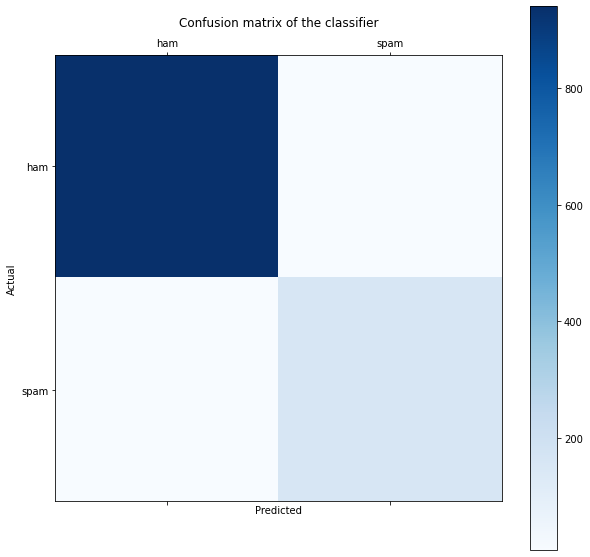

In [17]:
plot_confusion_matrix(confusion_matrix)